# TEXT EMOTION DETECTION

Libs used:
1. pandas
2. numpy
3. seaborn
4. scikit-learn
5. neattext



In [17]:
import pandas as pd
import numpy as np
import seaborn as sns

### Loading the dataset

In [19]:
df = pd.read_csv("Dataset/Dataset_1.csv")
df.head()

,Unnamed: 0,text,Emotion
0,0,i seriously hate one subject to death but now ...,hate
1,1,im so full of life i feel appalled,neutral
2,2,i sit here to write i start to dig out my feel...,neutral
3,3,ive been really angry with r and i feel like a...,anger
4,4,i feel suspicious if there is no one outside l...,neutral


In [20]:
df['Emotion'].value_counts()

Emotion
neutral       674538
love           39553
happiness      27175
sadness        17481
relief         16729
hate           15267
anger          12336
fun            10075
enthusiasm      9304
surprise        6954
empty           5542
worry           4475
boredom          126
Name: count, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

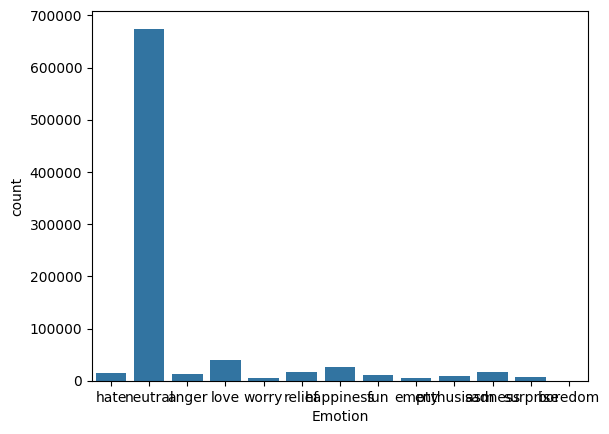

In [21]:
sns.countplot(x='Emotion',data=df)

### Data pre-processing

In [22]:
import neattext.functions as nfx

# Remove the user handles
df['text'] = df['text'].apply(nfx.remove_userhandles)

In [23]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [24]:
# Remove the stopwords
df['text'] = df['text'].apply(nfx.remove_stopwords)

In [25]:
df

,Unnamed: 0,text,Emotion
0,0,seriously hate subject death feel reluctant drop,hate
1,1,im life feel appalled,neutral
2,2,sit write start dig feelings think afraid acce...,neutral
3,3,ive angry r feel like idiot trusting place,anger
4,4,feel suspicious outside like rapture happened,neutral
...,...,...,...
839550,839550,feel like telling horny devils find site suite...,neutral
839551,839551,began realize feeling agitated restless though...,neutral
839552,839552,feel curious previous early dawn time seek tro...,neutral
839553,839553,feel becuase tyranical nature government el sa...,neutral


### Splitting data into input variables and target variable

x: Features are the attributes and variables extracted from the dataset. These extracted features are used as inputs to the model during training.

y: Labels are the output or the target variable.

In [26]:
x = df['text']
y = df['Emotion']

### Splitting data into train and test set

We need to split our dataset into a train set and test set. The model will learn from the train set. We will use the test set to evaluate the model performance and measure the model’s knowledge capability.

In [27]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

### Training the model

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [30]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])
pipe_lr.fit(x_train,y_train)
pipe_lr.score(x_test,y_test)

/home/abraham-tahseen/Documents/Text Based Emotion Detection/AIEnv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9901376520147538

### Saving the model

In [31]:
import joblib
pipeline_file = open("Saved Models/custom_text_emotion.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()

### Testing the model

In [32]:
import joblib

pipe_lr = joblib.load(open("Saved Models/custom_text_emotion.pkl", "rb"))

def predict_emotions(docx):
    results = pipe_lr.predict([docx])
    return results[0]
def get_prediction_proba(docx):
    results = pipe_lr.predict_proba([docx])
    return results

In [39]:
diary_notes = [
  # Neutral
  "Today was a pretty uneventful day. Everything went according to plan, which is nice for a change. I did my usual routine, got my work done, and finished it off with a relaxing evening.",

  # Love
  "My heart feels full of love today. Spending time with my loved ones brought so much joy. Whether it's a simple conversation, a shared meal, or just being in their presence, I feel incredibly grateful for their love and support.",

  # Happiness
  "I woke up feeling happy for no particular reason. The world seems bright and full of possibilities. Everything feels lighter, and I can't help but smile at the little things.",

  # Sadness
  "A wave of sadness washed over me today. Missing someone special and reliving past memories brought a lump to my throat. It's okay to feel sad, and I'll allow myself to grieve for a while.",

  # Relief
  "A huge weight lifted off my shoulders today. A stressful situation finally resolved itself, and I feel a sense of calm and relief. It's like I can finally breathe again.",

  # Hate
  "It's a dark abyss, swallowing up any trace of warmth or compassion. Every thought is tainted by its corrosive touch, twisting and distorting even the most innocent of intentions. It's a heavy burden to bear, dragging me down into a pit of despair and bitterness. And yet, despite my efforts to escape its grasp, it lingers like a shadow, haunting every corner of my being.",

  # Anger
  "Feeling like a volcano on the verge of eruption, my blood boils with a furious intensity. Every breath I take feels like inhaling fire, my muscles tense with pent-up rage. My thoughts are a tempest, swirling with resentment and indignation, ready to unleash their storm upon the world.",

  # Fun
  "Last night was a blast! Laughter filled the air as we hung out with friends and played games. It was a much-needed escape from the daily routine, filled with lighthearted fun and good company.",

  # Enthusiasm
  "I'm so excited about this new project! It sparks a fire within me, and I can't wait to get started. This opportunity brings a sense of enthusiasm and motivation that's truly inspiring.",

  # Surprise
  "Wow, that completely surprised me!  I did not expect such a delightful turn of events. This unexpected good fortune left me speechless with surprise.",

  # Empty
  "I feel strangely empty today. There's no particular sadness or anger, just a void that seems to consume me. Perhaps some time for self-reflection is needed to reconnect with myself.",

  # Worry
  "A nagging worry keeps creeping into my mind today. It's a small issue, but it's difficult to shake off the feeling. Taking a step back and focusing on the present might help alleviate the anxiety.",

  # Boredom
  "Today feels like a drag. Everything seems repetitive and uninteresting. Some mental stimulation or a change of pace could help break out of this boredom spell."
]


In [40]:
for i in diary_notes:
    prediction = predict_emotions(i)
    probability = get_prediction_proba(i)

    print(prediction, " : ", probability, '\n')
    

neutral  :  [[9.02417843e-04 1.57084591e-04 8.95450807e-03 1.75778314e-05
  1.98635065e-03 8.00265875e-04 3.99175859e-04 5.42712726e-04
  9.65925159e-01 1.95802552e-02 2.09202331e-04 3.01990865e-04
  2.23298730e-04]] 

love  :  [[8.29205653e-16 3.16903590e-14 1.51767491e-09 2.03898713e-09
  1.26155306e-15 2.17703695e-15 5.75425498e-17 9.99999991e-01
  1.25771322e-20 1.03718620e-17 4.55172994e-09 4.58985599e-10
  1.42361808e-10]] 

happiness  :  [[8.60534537e-06 2.59148991e-05 5.36650382e-03 1.47508884e-03
  6.43297303e-04 9.63999193e-01 2.20219472e-02 4.31505321e-03
  3.29504771e-04 3.46421417e-05 8.42733889e-04 2.97337015e-04
  6.40178351e-04]] 

sadness  :  [[6.23706000e-13 3.60308977e-12 3.48338136e-07 6.11030467e-13
  1.29026909e-11 2.31624768e-12 8.23719672e-12 3.26891524e-14
  1.36746681e-10 4.58869096e-10 9.99999651e-01 1.22346861e-11
  2.52793032e-12]] 

relief  :  [[7.40957489e-05 3.35564079e-06 6.20085018e-05 3.89499445e-06
  2.70529086e-04 9.35482051e-04 6.71698783e-04 1.529